# Practice 4 - Multiple linear regression

### <span style="color:red"> WRITE YOUR NAME HERE: </span>  SENA NUR BILGIN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from typing import Optional
import math
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [2]:
data = pd.read_csv("/Users/xenanurbilgin/XENA_FOLDERS/EPITA/EPITA_SENA/Machine_Learning/Assignment4/Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Part 1: Hands-On Multiple Linear Regression

### Data preparation
We have already isolated the X and the y variables:  
- 'sales' is your target variable.  
- For now we will use 'TV' and 'radio' as features  

No need for a train-test split for now.

In [3]:
X = data[['TV', 'radio']].values
y = data['sales'].values.reshape(-1,1)
print(X)
print(y)

[[230.1  37.8]
 [ 44.5  39.3]
 [ 17.2  45.9]
 [151.5  41.3]
 [180.8  10.8]
 [  8.7  48.9]
 [ 57.5  32.8]
 [120.2  19.6]
 [  8.6   2.1]
 [199.8   2.6]
 [ 66.1   5.8]
 [214.7  24. ]
 [ 23.8  35.1]
 [ 97.5   7.6]
 [204.1  32.9]
 [195.4  47.7]
 [ 67.8  36.6]
 [281.4  39.6]
 [ 69.2  20.5]
 [147.3  23.9]
 [218.4  27.7]
 [237.4   5.1]
 [ 13.2  15.9]
 [228.3  16.9]
 [ 62.3  12.6]
 [262.9   3.5]
 [142.9  29.3]
 [240.1  16.7]
 [248.8  27.1]
 [ 70.6  16. ]
 [292.9  28.3]
 [112.9  17.4]
 [ 97.2   1.5]
 [265.6  20. ]
 [ 95.7   1.4]
 [290.7   4.1]
 [266.9  43.8]
 [ 74.7  49.4]
 [ 43.1  26.7]
 [228.   37.7]
 [202.5  22.3]
 [177.   33.4]
 [293.6  27.7]
 [206.9   8.4]
 [ 25.1  25.7]
 [175.1  22.5]
 [ 89.7   9.9]
 [239.9  41.5]
 [227.2  15.8]
 [ 66.9  11.7]
 [199.8   3.1]
 [100.4   9.6]
 [216.4  41.7]
 [182.6  46.2]
 [262.7  28.8]
 [198.9  49.4]
 [  7.3  28.1]
 [136.2  19.2]
 [210.8  49.6]
 [210.7  29.5]
 [ 53.5   2. ]
 [261.3  42.7]
 [239.3  15.5]
 [102.7  29.6]
 [131.1  42.8]
 [ 69.    9.3]
 [ 31.5  2

### Upgrade the MyLinearRegression class 
Complete the following class to implement multiple linear regression.

In [4]:
class MyLinearRegression:
    def __init__(self):
        self.beta: Optional[np.ndarray] = None
    
    def set_beta(self, beta: np.ndarray):
        self.beta = beta
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # YOUR CODE HERE
        X_prime= np.insert(X,0,1,axis=1) # (1 ,X1 ,X2 ...) * (B0,B1,B2....)
        return X_prime @ self.beta

In [5]:
test_regr = MyLinearRegression()
test_regr.set_beta(np.ones(3))
predictions = test_regr.predict(X)

assert X.shape[1] == 2, "❌ Your X_train matrix should have 2 columns"
assert y.shape == (200,1), "❌ Your y vector has the wrong shape."
assert isinstance(predictions, np.ndarray), "❌ Your regressor should return a numpy array."
assert predictions.shape in [y.shape, (200,)], "❌ Your array of predictions should have the same shape as y."
assert math.isclose(predictions[0], X[0,:].sum() + 1), "❌ Your calculations within the predict() method aren't quite right."
print("👌 Seems good.")

👌 Seems good.


### Visualize multiple regression 

#### Choose beta values at random and visualize your model in 3d
- Beta_0
- Beta_1 for TV advertisement
- Beta_2 for Radio advertisement

#### Then try to adjust your parameters to get the best fit possible.

In [6]:
beta = np.array([ 1, 0.07,0.09
    ## YOUR VALUES HERE
   
])

my_linear_regression = MyLinearRegression()
my_linear_regression.set_beta(beta)
assert len(beta) == 3, "❌ You should have 3 parameters"

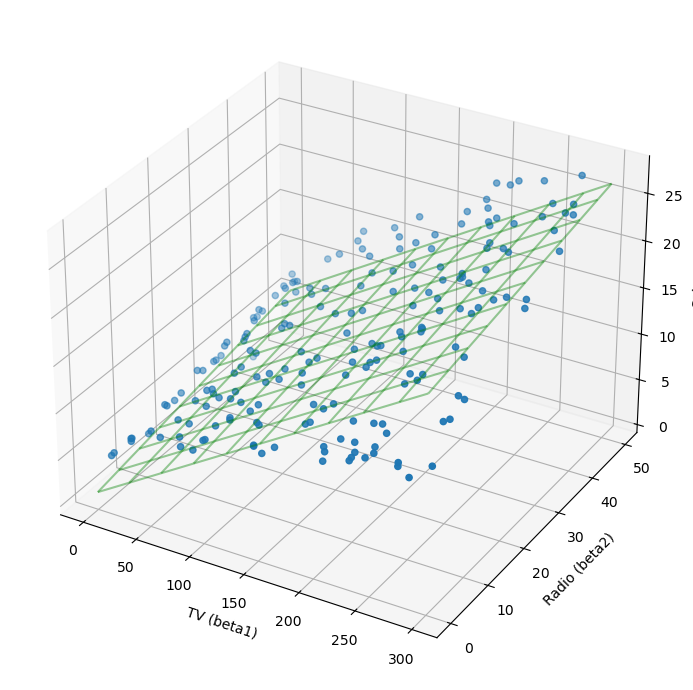

In [7]:
# Use this function to visualize your regression in 3d

def visualize_3d(regression_model):
    def create_mesh(beta):
        x_values = np.linspace(0, 300, 50).reshape(-1,1)
        y_values = np.linspace(0, 50, 50).reshape(-1,1)
        x_mesh, y_mesh = np.meshgrid(x_values, y_values)
        z_mesh = beta[0] + beta[1] * x_mesh + beta[2] * y_mesh
        return x_mesh, y_mesh, z_mesh
    
    if isinstance(regression_model, LinearRegression):
        beta = np.hstack([regression_model.intercept_, regression_model.coef_.squeeze()])
    else:
        beta = regression_model.beta
        
    x_mesh, y_mesh, z_mesh = create_mesh(beta)
    
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection="3d")
    
    ax.scatter3D(data['TV'], data['radio'], data['sales'].squeeze())
    ax.plot_wireframe(x_mesh, y_mesh, z_mesh, rstride=5, cstride=5, alpha=0.4, color='g')
    
    ax.set_xlabel('TV (beta1)')
    ax.set_ylabel('Radio (beta2)')
    ax.set_zlabel('Sales')
    plt.tight_layout()
    plt.show()
    
visualize_3d(my_linear_regression)

### Train a linear regression model with Scikit-learn, visualize it and retrieve its learned parameters. 
Do you obtain parameter values that are close to what you arrived at by hand?

# Part 2: Hands-on  polynomial regression 
Here we will focus on one feature, 'TV', but we will create polynomial features from it.

### Data Preparation 

In [8]:
X_poly = data[['TV' ]]
y_poly = data['sales']
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly, y_poly, test_size = 0.25, random_state = 0)

### Create a pipeline to combine the following elements
To make our code much cleaner and easier to follow, we will pack all our transformers, along with our regressor, into a pipeline. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- PolynomialFeatures of degree 8
- A StandardScaler (Can you tell why this is necessary?)
- A LinearRegression model (Sklearn)

In [9]:

polynomial_regression_pipeline = Pipeline([
('poly', PolynomialFeatures(degree=8)),
('scaler', StandardScaler()),
('LinReg', LinearRegression())
])




### Fit your pipeline on the poly training set and retrieve the coefficients of your LinearRegression
Hint: you can access the regressor by calling `.named_steps['name_of_the_pipeline_step']` on your pipeline.

In [10]:
polynomial_regression_pipeline.fit(X_train_poly,y_train_poly)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()), ('LinReg', LinearRegression())])

#### Play with the degree of the polynomial features and see what happens to the size of the coefficients.

In [11]:
linreg =polynomial_regression_pipeline.named_steps['LinReg']

linreg.intercept_,linreg.coef_

(14.351333333335733,
 array([ 0.00000000e+00,  1.09324550e+01,  1.32457280e+02, -1.59262640e+03,
         6.67288571e+03, -1.40918648e+04,  1.61468276e+04, -9.59498383e+03,
         2.32046264e+03]))

###  Visualize your polynomial regression model
Use the function defined for you below.

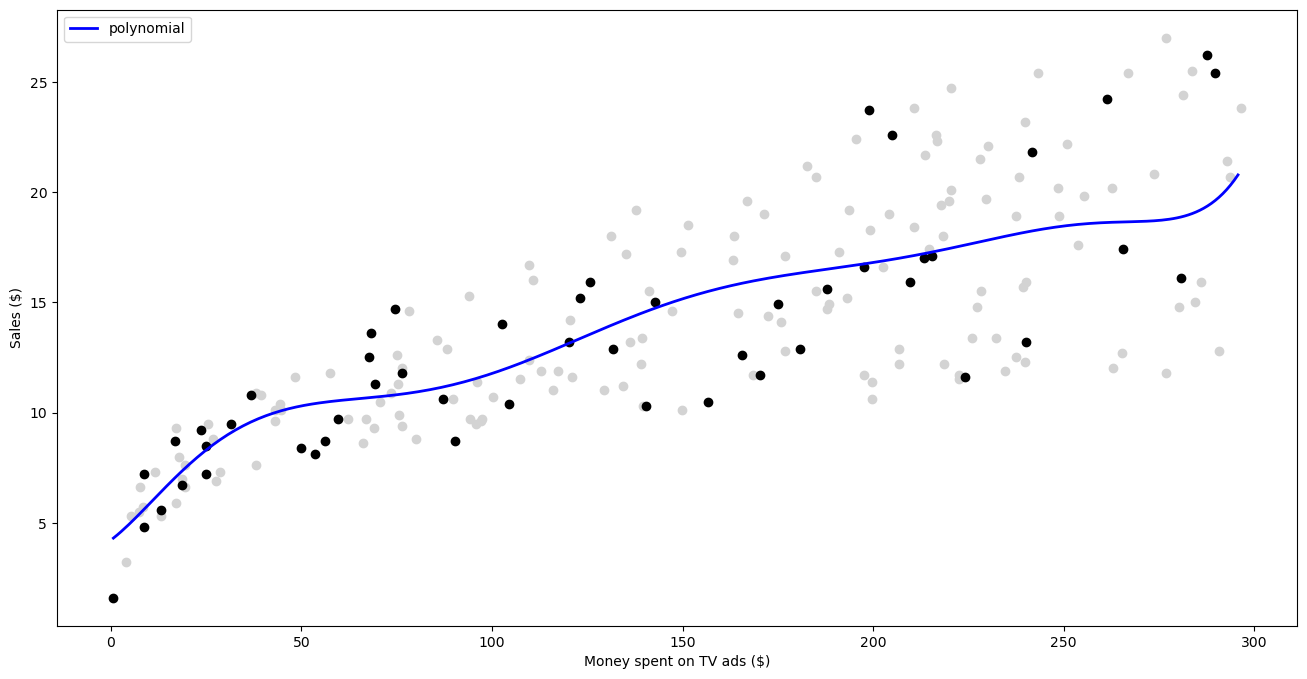

In [12]:
def visualize_polynomial(polynomial_regression_pipeline):
    X_plot = pd.DataFrame({'TV': np.arange(min(data['TV']),max(data['TV']),1)})
    y_poly_plot = polynomial_regression_pipeline.predict(X_plot)

    plt.figure(figsize=(16, 8))
    plt.scatter(X_train_poly, y_train_poly, c='lightgray')
    plt.scatter(X_val_poly, y_val_poly, c='black')
    plt.plot(X_plot, y_poly_plot, c='blue', linewidth=2, label='polynomial')

    plt.xlabel("Money spent on TV ads ($)")
    plt.ylabel("Sales ($)")
    plt.legend()
    plt.show()

visualize_polynomial(polynomial_regression_pipeline)

#### Play with the degree of the polynomial features and see what happens to the curve

# Part 3: Assignment 
## Data Exploration

### a) Compute the correlation matrix

In [13]:
data.head()





,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
# Calculate the correlation matrix among numeric features
corr = data.corr()
# Apply the gradient color map to the correlation matrix and display it
corr.style.background_gradient(cmap='coolwarm')
# Other good diverging colormaps: 'RdBu_r', 'BrBG_r', & 'PuOr_r'


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### b) Plot the sales as a function of the variable that is the most correlated with them

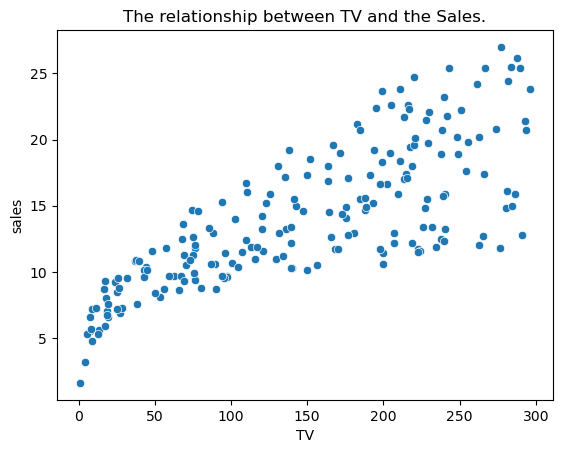

In [15]:
sns.scatterplot(x='TV',y='sales',data=data)
plt.title("The relationship between TV and the Sales.")
# Show plot
plt.show()


### c) Plot the sales as a function of the variable that is the LEAST correlated

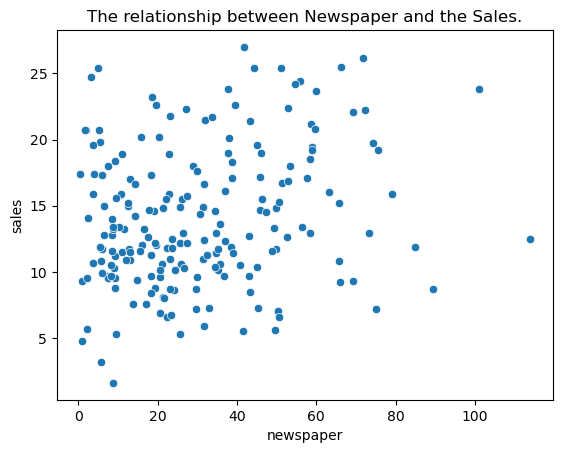

In [16]:
sns.scatterplot(x='newspaper',y='sales',data=data)
plt.title("The relationship between Newspaper and the Sales.")
# Show plot
plt.show()


## Evaluation
Before we move further, you will create a function that you will reuse over and over to evaluate your models. It may look a little complex at first, but you will see later, when you compare multiple models, that it is very handy to pack your results in a tabular form.  

Your function should:
- Generate predictions with the model on the validation datset
- Compute the following metrics: MSE, RMSE, MAE, R2 (you can use sklearn's implementation)
- Pack the results in a dataframe, with each metric on a separate row, and the name of the metric should be the index of the row.
- The results should appear in the same column, whose name describe the model variant you are evaluating.

In [17]:

def evaluate_regression(regressor, name, X_val, y_val):
    # Make predictions
    y_pred = regressor.predict(X_val)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Print evaluation metrics
    print(f"Evaluation for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    
    # Return evaluation metrics as dictionary
    return {'MSE': mse, 'MAE': mae, 'R-squared': r2}


### Test your function: evaluate one of your previous models 

In [18]:
evaluate_regression(polynomial_regression_pipeline, 'poly_regression', X_val_poly, y_val_poly)

Evaluation for poly_regression:
MSE: 8.9158
MAE: 2.3034
R-squared: 0.6837


{'MSE': 8.915818473147487,
 'MAE': 2.303449375442739,
 'R-squared': 0.6836736191360111}

## Crazily overfitting model
We will now experiment how a very complex model can be regularized.

### We will re-define the features in order to use all variables. 
We define the following variables (nothing for you to do here):
- X_all_train
- y_train
- X_all_val
- y_val

In [19]:
X_all = data.drop('sales', axis=1)
y = data['sales']
X_all_train, X_all_val, y_train, y_val = train_test_split(X_all, y, test_size = 0.25, random_state = 0)

### Train a linear regression model on all 3 features, with polynomial features of degree 15
You should consider using a Pipeline as in the previous section.

In [20]:
# Creating the polynomial regression pipeline 
polynomial_regression_pipeline2 = Pipeline([
    ('poly2', PolynomialFeatures(degree=15)),
    ('scaler', StandardScaler()),
    ('LinReg', LinearRegression())
])

# Fitting the pipeline on the training data
polynomial_regression_pipeline2.fit(X_all_train, y_train)


Pipeline(steps=[('poly2', PolynomialFeatures(degree=15)),
                ('scaler', StandardScaler()), ('LinReg', LinearRegression())])

### Evaluate your overfitting model with your evaluation function 

In [21]:
# Evaluating the model using the updated evaluate_regression function
evaluation_results = evaluate_regression(polynomial_regression_pipeline2, "Polynomial Regression (degree=15)", X_all_val, y_val)

# Access evaluation metrics if needed
print("Evaluation results:", evaluation_results)

Evaluation for Polynomial Regression (degree=15):
MSE: 7433991885.7020
MAE: 12567.5055
R-squared: -263752312.4481
Evaluation results: {'MSE': 7433991885.702049, 'MAE': 12567.505544732658, 'R-squared': -263752312.44814867}


These results collectively indicate that the polynomial regression model with degree 15 is likely overfitting the training data and performing poorly on the validation set. Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern, resulting in poor generalization to unseen data.

To enhance the performance of the polynomial regression model, several strategies can be implemented. First, reducing the complexity by decreasing the degree of the polynomial helps prevent overfitting and improves generalization to unseen data. Second, incorporating regularization techniques such as Lasso or Ridge regression helps control the model's complexity by penalizing large coefficients, further mitigating overfitting.

### Regularize your model: 
- Write a new version of your pipeline, but instead of using LinearRegression, use Ridge regression
- evaluate your regularized model


In [22]:
polynomial_regression_pipeline3 = Pipeline([
    ('poly2', PolynomialFeatures(degree=15)),
    ('scaler', StandardScaler()),
    ('ridge1',  Ridge(alpha=37))
])

# Fitting the pipeline on the training data
polynomial_regression_pipeline3.fit(X_all_train, y_train)
# Evaluating the model using the updated evaluate_regression function
evaluation_results = evaluate_regression(polynomial_regression_pipeline3, "Polynomial Regression (degree=15) - Ridge1", X_all_val, y_val)

# Access evaluation metrics if needed
print("Evaluation results:", evaluation_results)


Evaluation for Polynomial Regression (degree=15) - Ridge1:
MSE: 5.0786
MAE: 1.1728
R-squared: 0.8198
Evaluation results: {'MSE': 5.078556537936214, 'MAE': 1.1728146777700952, 'R-squared': 0.8198167207534691}


 Tuned Polynomial Regression model with Ridge regularization performs well on the validation set. The relatively low MSE and MAE values indicate accurate predictions, while the high R-squared value suggests that a significant portion of the variance in the sales data is captured by the model. This indicates that the model is effective in capturing the underlying patterns in the data and making reliable predictions.

### Tune your regularizer
The Ridge regressor has an alpha hyperparameter [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Already with the default setting, you were able to improve a lot your performance. Try adjusting the alpha hyperparameter to see if you can bring up the performance even more. Try out different values and keep the one that gives the best results.

Adjusting the alpha parameter in the Ridge regression if necessary to control the strength of regularization. Lower values of alpha indicate weaker regularization, while higher values indicate stronger regularization. We may need to experiment with different values to find the optimal regularization strength for dataset.

Optimal:


In [23]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alpha_values = np.arange(1, 51, 1) # Add more values as needed

# Define the parameter grid
param_grid = {'ridge1__alpha': alpha_values}  # Using ridge1 for the Ridge regression step

# Perform grid search cross-validation
grid_search = GridSearchCV(polynomial_regression_pipeline3, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_all_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge1__alpha']

# Print the best alpha value
print("Best alpha value:", best_alpha)

# Refit the model with the best alpha value
best_model = grid_search.best_estimator_
best_model.fit(X_all_train, y_train)

# Evaluate the best model
evaluation_results_best = evaluate_regression(best_model, "Polynomial Regression (degree=15) - Ridge (Best Alpha)", X_all_val, y_val)

# Print evaluation results
print("Evaluation results with best alpha:", evaluation_results_best)


Best alpha value: 37
Evaluation for Polynomial Regression (degree=15) - Ridge (Best Alpha):
MSE: 5.0786
MAE: 1.1728
R-squared: 0.8198
Evaluation results with best alpha: {'MSE': 5.078556537936214, 'MAE': 1.1728146777700952, 'R-squared': 0.8198167207534691}
